In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,recall_score


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_d = pd.read_csv("/kaggle/input/playground-series-s3e2/train.csv")
test_d = pd.read_csv("/kaggle/input/playground-series-s3e2/test.csv")


#### Data Analysis

In [3]:
train_d.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
11481,11481,Female,61.0,0,0,Yes,Govt_job,Urban,99.07,24.5,Unknown,0
7097,7097,Male,11.0,0,0,No,children,Urban,121.43,25.1,Unknown,0
14005,14005,Male,55.0,0,0,Yes,Private,Rural,59.87,26.0,formerly smoked,0
10845,10845,Male,65.0,0,0,Yes,Private,Rural,87.94,21.8,never smoked,0
3175,3175,Female,23.0,0,0,No,Private,Urban,94.62,31.8,smokes,0


In [4]:
print(train_d.shape)
# print(test_d.shape)

(15304, 12)


In [5]:
# checking if we have null values in our data or not
train_d.isnull().sum() 

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
# frequency distribution of heart disease
train_d.groupby('stroke').size()

stroke
0    14672
1      632
dtype: int64

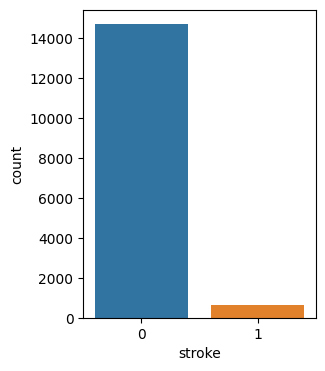

In [7]:
# visualizing the frequency distribution 
f,ax = plt.subplots(figsize =(3,4))
ax = sns.countplot(x='stroke', data = train_d)
plt.show()

In [8]:
# how many males and females are with or without the disease
train_d.groupby('gender')['stroke'].value_counts()

gender  stroke
Female  0         9078
        1          368
Male    0         5593
        1          264
Other   0            1
Name: stroke, dtype: int64

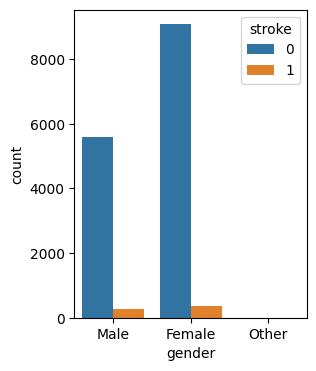

In [9]:
f,ax = plt.subplots(figsize =(3,4))
ax = sns.countplot(x='gender',hue ='stroke',data = train_d)
plt.show()

In [10]:
train_d.groupby('heart_disease')['stroke'].value_counts()

heart_disease  stroke
0              0         14381
               1           566
1              0           291
               1            66
Name: stroke, dtype: int64

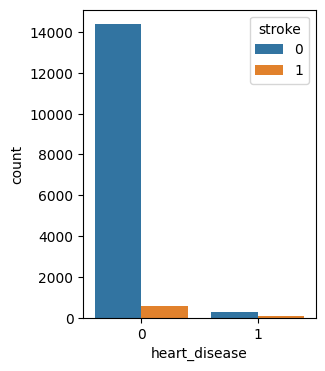

In [11]:
f,ax = plt.subplots(figsize =(3,4))
ax = sns.countplot(x='heart_disease',hue ='stroke',data = train_d)
plt.show()

In [12]:
train_d.stroke.describe()

count    15304.000000
mean         0.041296
std          0.198981
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: stroke, dtype: float64

In [13]:
# finding the correlation between the columns
train_d.corr()['stroke'].sort_values(ascending = True)

/tmp/ipykernel_21/1079956348.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_d.corr()['stroke'].sort_values(ascending = True)


id                  -0.017290
bmi                  0.065393
heart_disease        0.111518
hypertension         0.145895
avg_glucose_level    0.149273
age                  0.261320
stroke               1.000000
Name: stroke, dtype: float64

In [14]:
train_d['age'].value_counts()
# train_d.age.nunique()

57.00    353
78.00    337
53.00    311
31.00    310
45.00    309
        ... 
0.16       6
0.08       6
0.48       3
1.30       2
0.68       1
Name: age, Length: 106, dtype: int64

In [15]:
# Encoding categorical columns
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for column in categorical_columns:
    train_d[column] = label_encoder.fit_transform(train_d[column])
    test_d[column] = label_encoder.fit_transform(test_d[column])


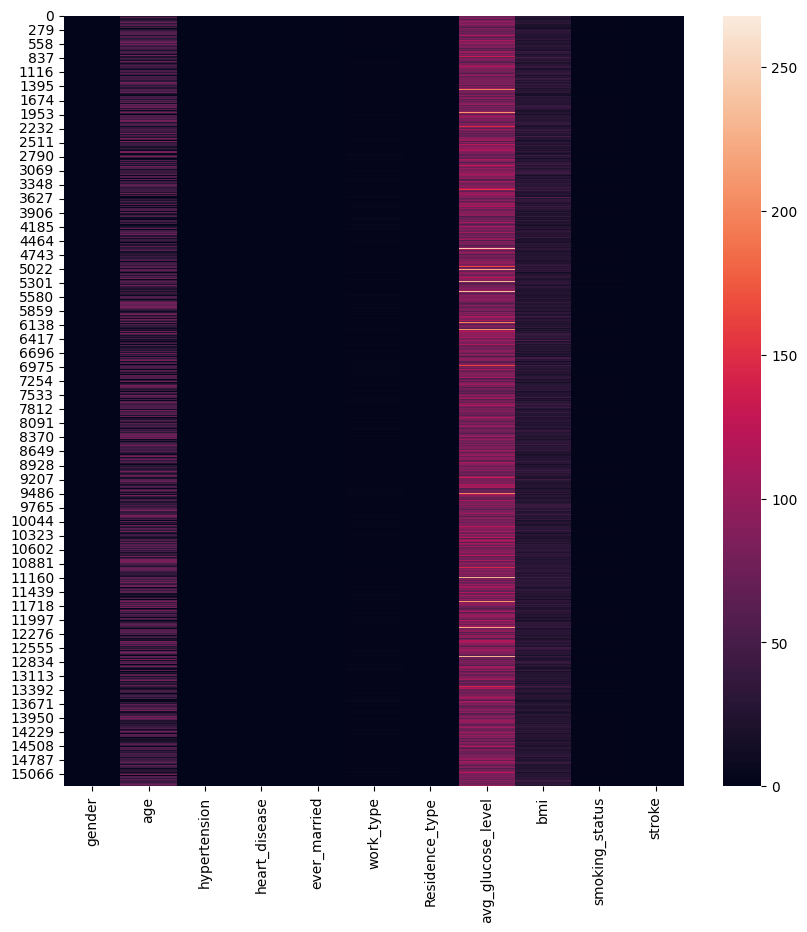

In [16]:
fig,ax = plt.subplots(figsize =(10,10))
sns.heatmap(train_d[['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','stroke']])
plt.show()

/tmp/ipykernel_21/2015881250.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_d['smoking_status'])


<AxesSubplot: xlabel='smoking_status', ylabel='Density'>

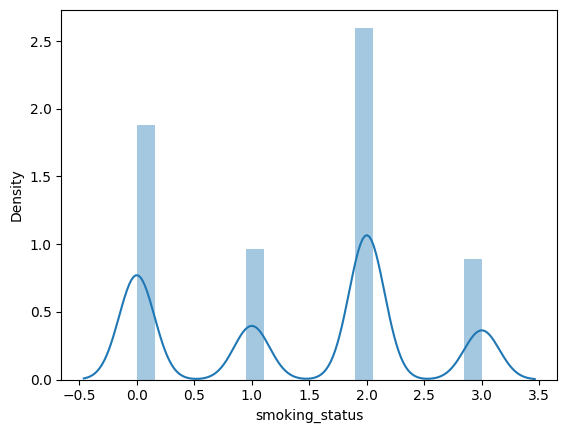

In [17]:
 sns.distplot(train_d['smoking_status'])

### Training the Model 

In [18]:
X = train_d.drop('stroke',axis =1)
y = train_d['stroke']

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
model = LogisticRegression()


In [21]:
model.fit(X_train, y_train)


LogisticRegression()

In [22]:
y_val_pred = model.predict(X_val)
print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2931
           1       0.29      0.02      0.03       130

    accuracy                           0.96      3061
   macro avg       0.62      0.51      0.50      3061
weighted avg       0.93      0.96      0.94      3061



In [23]:
accuracy_score(y_val, y_val_pred)

0.9565501470107808

In [24]:
print("The accuracy of the model is:", accuracy_score(y_val, y_val_pred) * 100)


The accuracy of the model is: 95.65501470107807
